# 2.4 Python编程实践———购物车分析

# 2.4.1 业务理解

In [1]:
# （略）详见教材内容。本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》
#（朝乐门主编，机械工业出版社，2022年）的配套代码。

In [2]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

In [4]:
association_rules?

# 2.4.2 读入数据

In [5]:
#数据来源 https://archive.ics.uci.edu/ml/datasets/online+retail
df_Retails = pd.read_excel('Online Retail.xlsx')
df_Retails.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
pd.read_excel?

# 2.4.3 数据理解

In [7]:
df_Retails.shape

(541909, 8)

In [8]:
df_Retails.columns
    # InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
        #If this code starts with letter 'c', it indicates a cancellation.
    # StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    # Description: Product (item) name. Nominal.
    # Quantity: The quantities of each product (item) per transaction. Numeric.
    # InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
    # UnitPrice: Unit price. Numeric, Product price per unit in sterling.
    # CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    # Country: Country name. Nominal, the name of the country where each customer resides.

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df_Retails.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df_Retails.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
#查看国家一列的取值
df_Retails.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
#各国家的购物数量
df_Retails["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [13]:
#查看InvoiceNo一列中是否有重复的值
df_Retails.duplicated(subset=["InvoiceNo"]).any()

True

# 2.4.4 数据预处理

In [14]:
#是否有缺失值
df_Retails.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
#空格处理
df_Retails['Description'] = df_Retails['Description'].str.strip()
    # Description: Product (item) name. Nominal.

In [38]:
df_Retails['Description'] = df_Retails['Description'].str?

In [ ]:
df_Retails['Description'] = df_Retails['Description'].str

In [16]:
#查看是否有缺失值
df_Retails['Description'].isna().sum()
#思考：此处，为什么【'Description'】一列的缺失值数量变为1455？In[10]对应的输出结果中为1454。

1455

In [17]:
#缺失值处理
df_Retails.dropna(axis=0
                  , subset=['Description']
                  , inplace=True)
    # InvoiceNo: Invoice number. Nominal,
    # a 6-digit integral number uniquely assigned to each transaction.
    # If this code starts with letter 'c', it indicates a cancellation.
   

In [18]:
df_Retails.shape

(540454, 8)

In [19]:
#查看是否有缺失值
df_Retails['Description'].isna().sum()

0

In [20]:
#删除含有C字母的已取消订单
df_Retails['InvoiceNo'] = df_Retails['InvoiceNo'].astype('str')

df_Retails = df_Retails[~df_Retails['InvoiceNo'].str.startswith('C')]

In [36]:
df_Retails = df_Retails[~df_Retails['InvoiceNo'].str.contains('C')]

In [21]:
df_Retails.shape

(531166, 8)

In [22]:
#将数据改为每一行一条购物记录
    #考虑到内存限制只计算Germany，全部计算则计算量太大
df_ShoppingCarts = (df_Retails[df_Retails['Country'] =="Germany"]               
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('InvoiceNo'))

df_ShoppingCarts.shape

(457, 1695)

In [23]:
df_ShoppingCarts.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_ShoppingCarts.reset_index().duplicated(subset=["InvoiceNo"]).any()

False

In [25]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_ShoppingCarts_sets = df_ShoppingCarts.applymap(encode_units)
df_ShoppingCarts_sets


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.4.5 产生频繁集

In [26]:
df_Frequent_Itemsets = apriori(df_ShoppingCarts_sets
                            , min_support=0.07
                            , use_colnames=True)
df_Frequent_Itemsets

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)
5,0.100656,(JUMBO BAG WOODLAND ANIMALS)
6,0.078775,(LUNCH BAG WOODLAND)
7,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
9,0.107221,(PLASTERS IN TIN SPACEBOY)


In [27]:
df_Frequent_Itemsets.shape

(39, 2)

# 2.4.6 计算强关联度

In [28]:
df_AssociationRules = association_rules(df_Frequent_Itemsets
                                        , metric="lift"
                                        , min_threshold=1)
    #输出结果的解读：https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
df_AssociationRules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,0.007738,1.707221
1,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.818381,0.102845,0.091904,0.112299,1.091933,0.007738,1.010651
2,(POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.818381,0.100656,0.087527,0.106952,1.062544,0.005152,1.007049
3,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.100656,0.818381,0.087527,0.869565,1.062544,0.005152,1.392414
4,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.115974,0.818381,0.100656,0.867925,1.060539,0.005746,1.375117


In [29]:
df_AssociationRules.shape

(34, 9)

In [30]:
df_A= df_AssociationRules[(df_AssociationRules['lift'] >= 2) &
       (df_AssociationRules['confidence'] >= 0.8) ]
df_A

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.52954
28,"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,0.087724,4.34081


In [31]:
df_A.shape

(2, 9)

# 2.4.6 可视化

<AxesSubplot:xlabel='support', ylabel='confidence'>

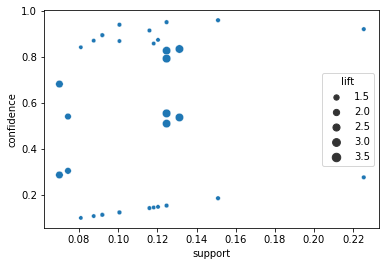

In [32]:
import seaborn as sns
sns.scatterplot(x = "support"
                , y = "confidence"
                , size = "lift"
                , data = df_AssociationRules)


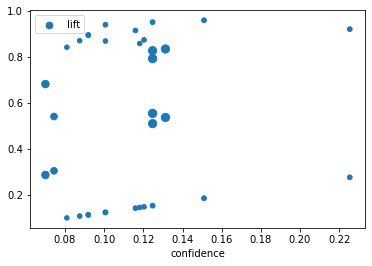

In [33]:
#换成教材的方式
import matplotlib.pyplot as plt

plt.scatter(x = df_AssociationRules['support']
           ,y = df_AssociationRules['confidence']
           ,s = df_AssociationRules['lift']*20 #将点大小放大20倍            
           )

plt.xlabel("support")
plt.xlabel("confidence")
plt.legend(["lift"])
plt.show()


In [34]:
plt.scatter?

In [35]:
# 本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。